# Bank Marketing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
13966,24235,38,management,married,tertiary,no,494,no,no,cellular,17,nov,146,1,104,2,other,no


We don't need the ID Column so drop this 

In [5]:
df = df.drop('ID',axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# EDA (Exploratory Data Analysis)

In [6]:
df.shape

(31647, 17)

In [7]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

<Axes: >

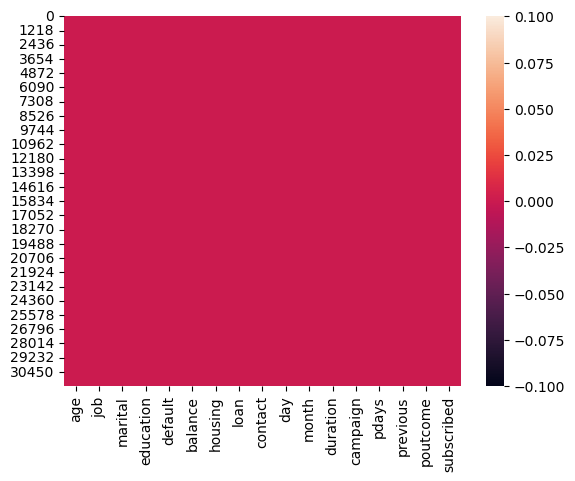

In [10]:
sns.heatmap(df.isnull())

This Heatmap shows us their is no null value present in the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Manipulating data

In [13]:
col = ['default','housing','loan','subscribed']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
df[col] = df[col].apply(convert)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0



Count of the every categorical variable present in the data

In [16]:
df['job'].astype("category").value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [17]:
df['marital'].astype("category").value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [18]:
df['education'].astype("category").value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [19]:
df['contact'].astype("category").value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [20]:
df['month'].astype("category").value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [21]:
df['poutcome'].astype("category").value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [23]:
categorical = df.select_dtypes(include=['object'])
categorical.head()


,job,marital,education,contact,month,poutcome
0,admin.,married,unknown,telephone,nov,unknown
1,unknown,married,secondary,cellular,jul,unknown
2,services,married,secondary,cellular,jul,unknown
3,management,divorced,tertiary,cellular,jun,success
4,technician,married,secondary,cellular,feb,unknown


In [24]:
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [27]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,31,0,3,0,0,20,91,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
2,27,0,891,1,0,18,240,1,-1,0,...,1,0,0,0,0,0,0,0,0,1
3,57,0,3287,0,0,22,867,1,84,3,...,0,1,0,0,0,0,0,0,1,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df.shape

(31647, 43)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  31647 non-null  int64
 1   default              31647 non-null  int64
 2   balance              31647 non-null  int64
 3   housing              31647 non-null  int64
 4   loan                 31647 non-null  int64
 5   day                  31647 non-null  int64
 6   duration             31647 non-null  int64
 7   campaign             31647 non-null  int64
 8   pdays                31647 non-null  int64
 9   previous             31647 non-null  int64
 10  subscribed           31647 non-null  int64
 11  job_blue-collar      31647 non-null  uint8
 12  job_entrepreneur     31647 non-null  uint8
 13  job_housemaid        31647 non-null  uint8
 14  job_management       31647 non-null  uint8
 15  job_retired          31647 non-null  uint8
 16  job_self-employed    3

# Checking outliers

In [31]:
check_out = df[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


In [32]:
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
90%,56.000000,3585.400000,28.000000,546.400000,5.000000,184.000000,2.000000
95%,59.000000,5768.000000,29.000000,752.000000,8.000000,313.000000,3.000000
99%,71.000000,13187.620000,31.000000,1259.000000,17.000000,370.000000,9.000000


<Axes: ylabel='previous'>

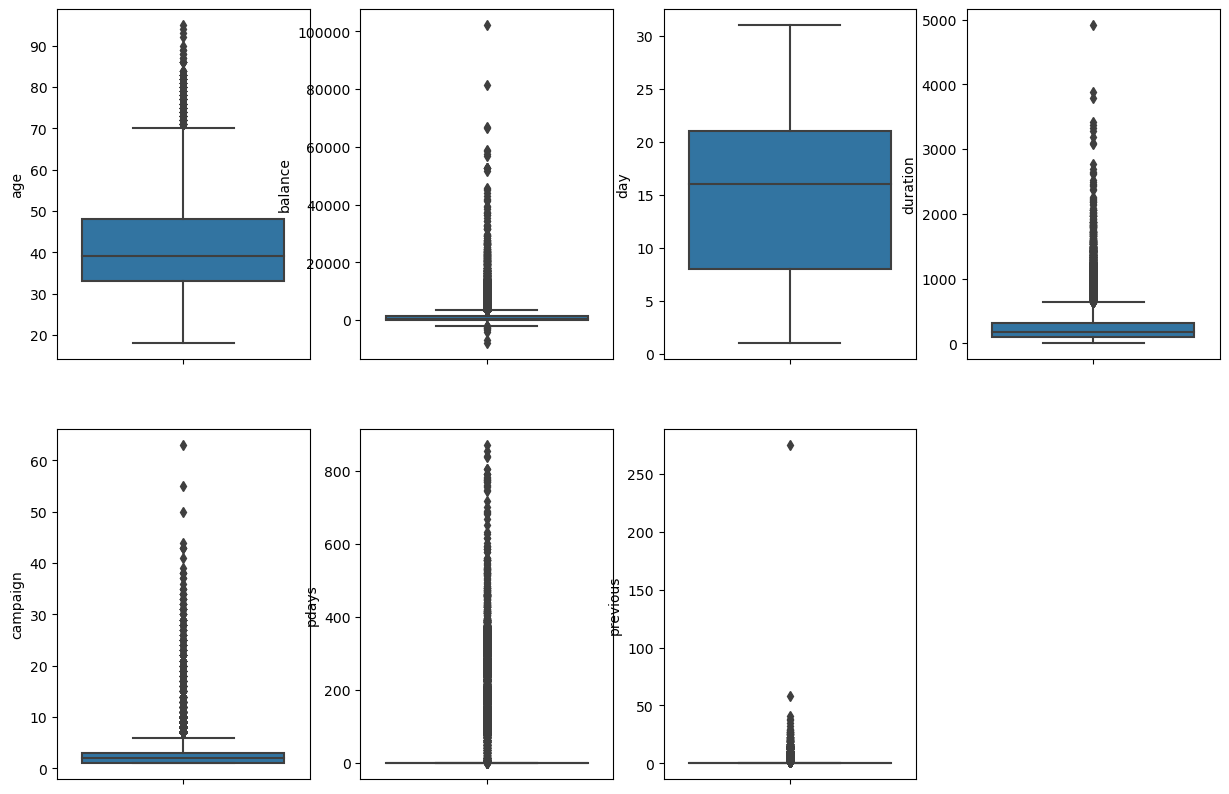

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=df)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=df)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=df)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=df)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=df)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=df)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=df)

As we can see there are too many outliers present in the dataset but we cannot drop it beacause of very large quantity and important for model making

# Checking the Correlation

<Axes: >

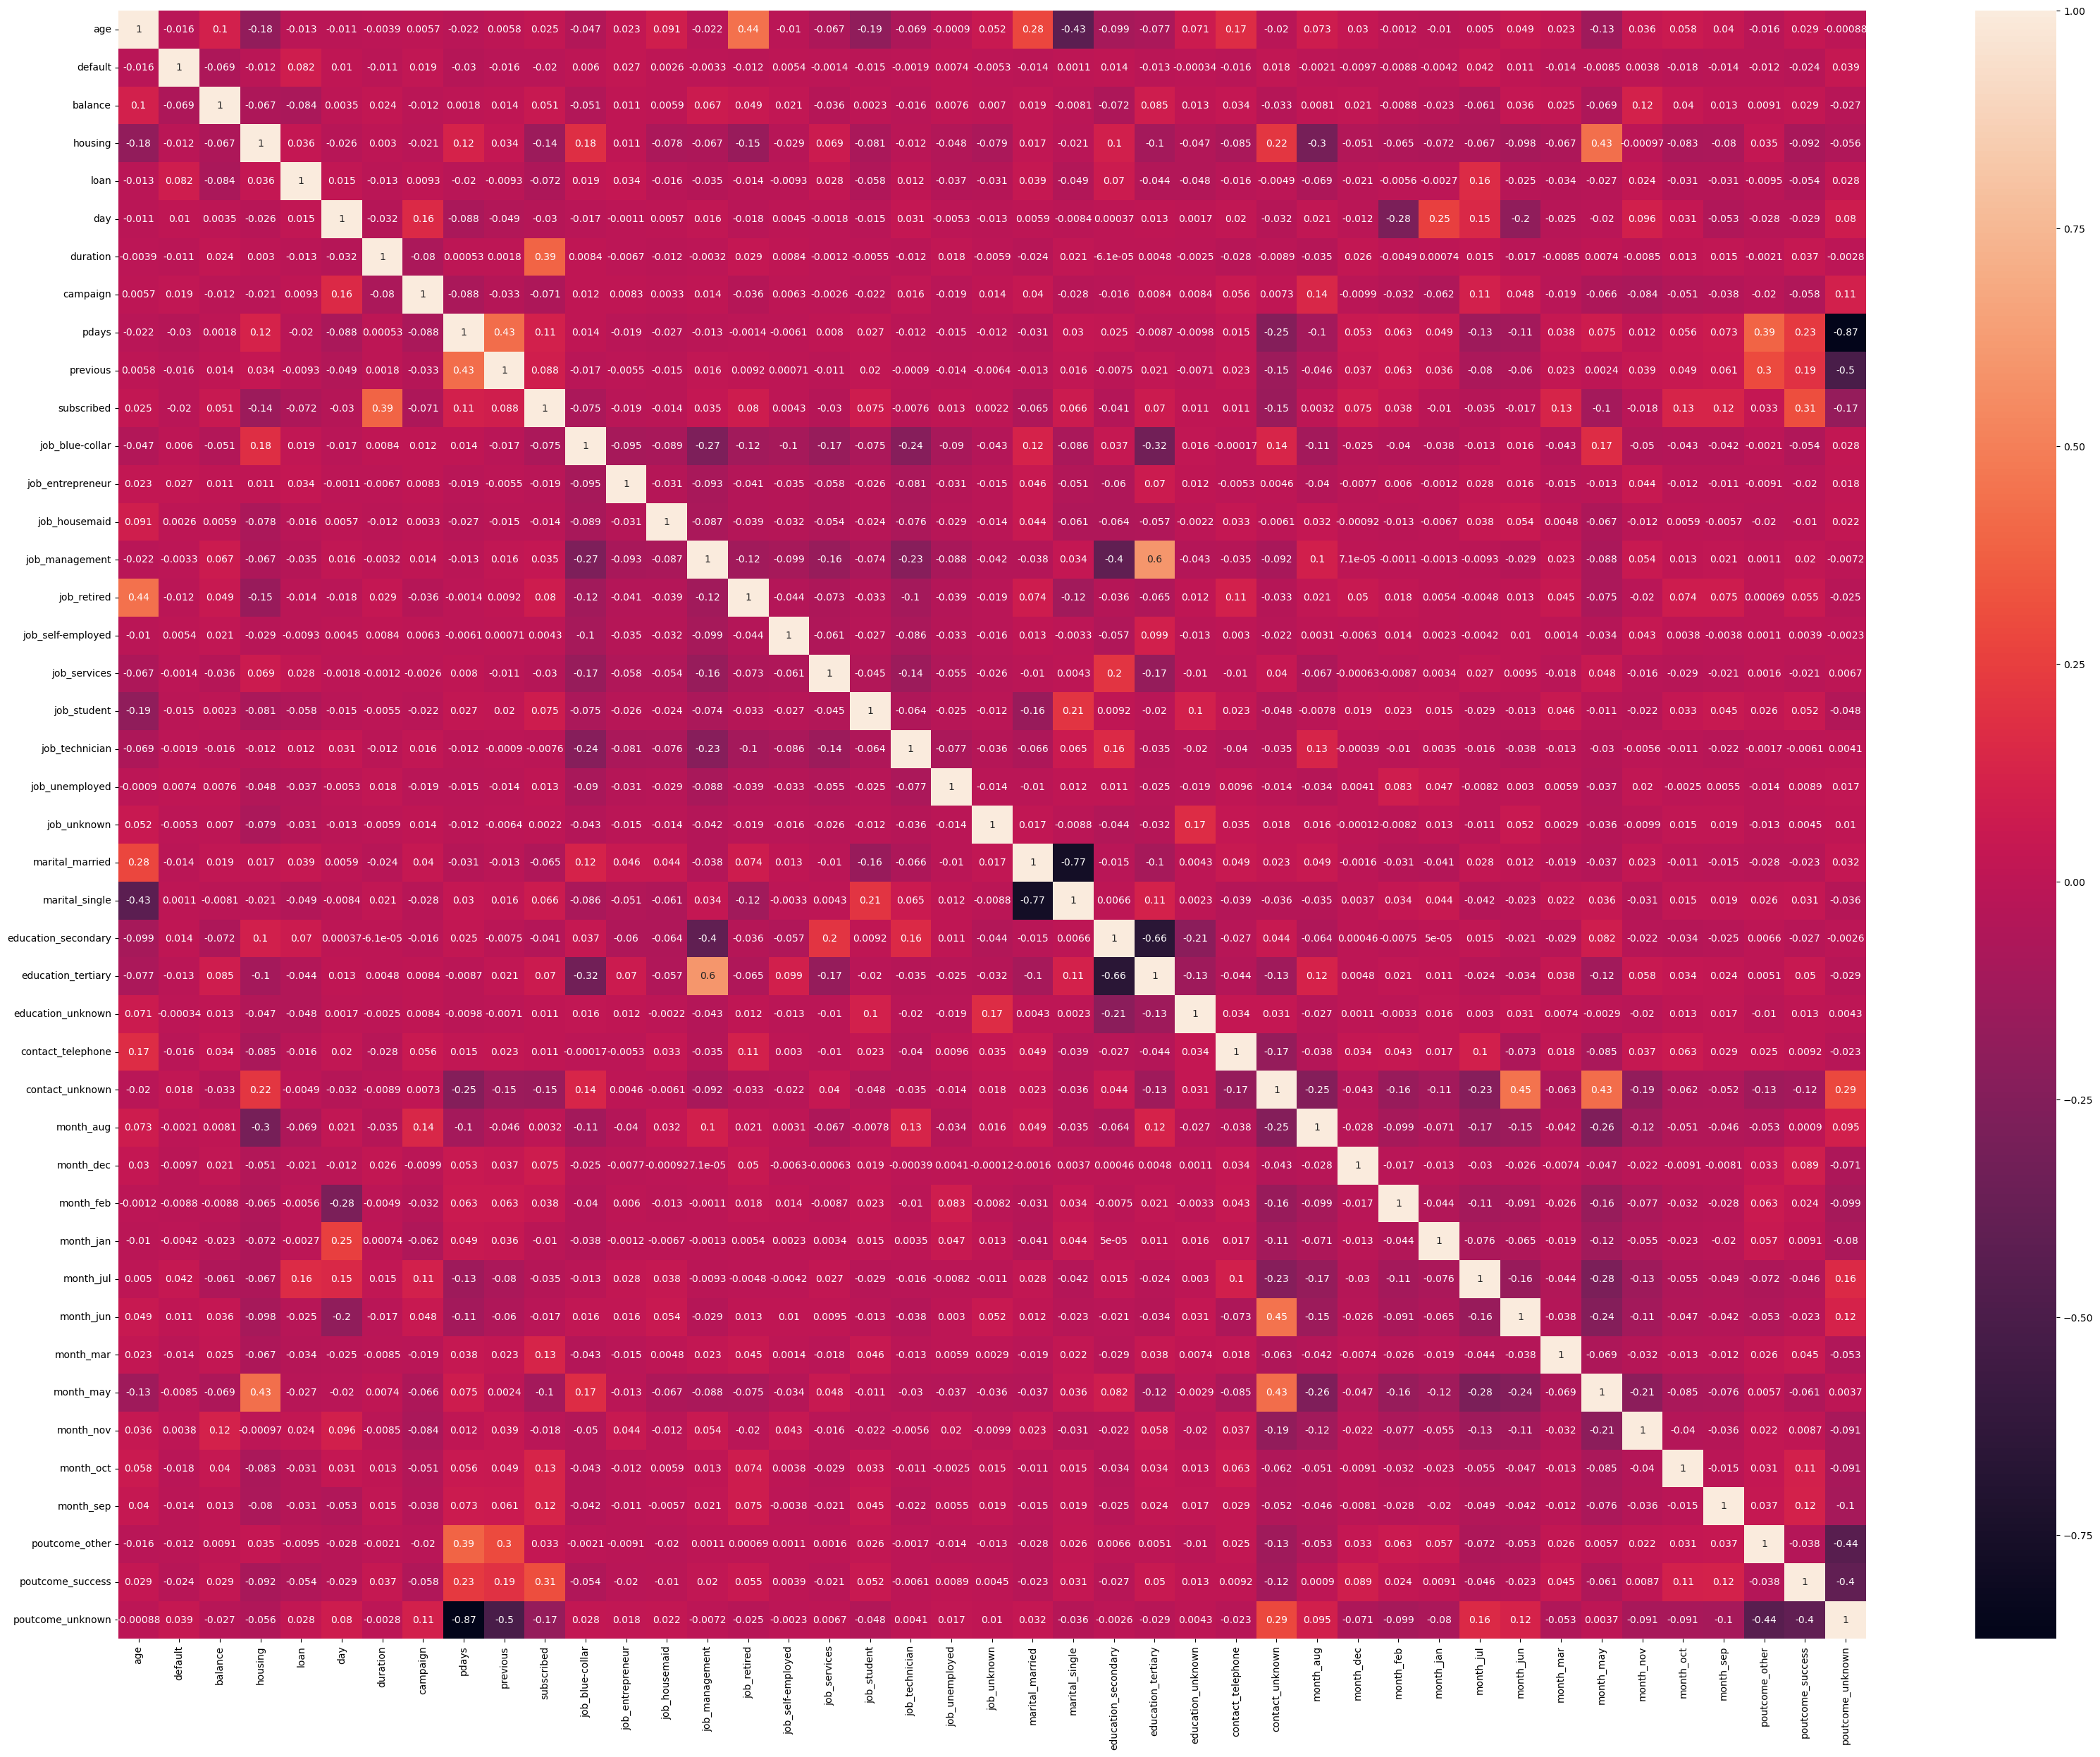

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

In [42]:
round((sum(df['subscribed'])/len(df.index))*100,2)

11.74

this shows that approximate 12% of people subscribed the term deposit 

Now plitting the variables into 2 parts 

In [44]:
X = df.drop(['subscribed'],1)
Y = df['subscribed']

In [45]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,31,0,3,0,0,20,91,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
2,27,0,891,1,0,18,240,1,-1,0,...,1,0,0,0,0,0,0,0,0,1
3,57,0,3287,0,0,22,867,1,84,3,...,0,1,0,0,0,0,0,0,1,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

# Train Test Split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling

In [48]:
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [49]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
5845,1.240777,0,0.642835,0,1,1.104168,-0.647231,1.373588,-0.409809,-0.220471,...,1,0,0,0,0,0,0,0,0,1
26021,-0.746756,0,-0.238601,1,0,0.262804,2.752750,-0.565039,-0.409809,-0.220471,...,1,0,0,0,0,0,0,0,0,1
3829,1.430066,0,-0.437699,0,0,0.382999,-0.860214,0.404274,-0.409809,-0.220471,...,0,0,0,0,0,0,0,0,0,1
21548,-0.746756,0,-0.734179,1,0,0.863779,-0.112837,-0.241935,-0.409809,-0.220471,...,0,0,0,1,0,0,0,0,0,1
10428,-0.841401,0,-0.596778,1,0,-0.338170,-0.608507,-0.241935,-0.409809,-0.220471,...,0,0,0,0,0,0,0,0,0,1


# Model Building: Logistic Regression

In [50]:
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             subscribed   No. Observations:                22152
Model:                            GLM   Df Residuals:                    22109
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5251.4
Date:                Wed, 17 Jan 2024   Deviance:                       10503.
Time:                        23:24:21   Pearson chi2:                 1.19e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2147
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6554      0.199     -8.314      0.000      -2.046      -1.265
age                    -0.0134      0.034     -0.399      0.690      -0.079       0.053
default                 0.2155      0.212      1.018      0.309      -0.199       0.630
balance                 0.0519      0.023      2.278      0.023       0.007       0.097
housing                -0.6398      0.063    -10.090      0.000      -0.764      -0.516
loan                   -0.4190      0.086     -4.862      0.000      -0.588      -0.250
day                     0.0756      0.030      2.530      0.011       0.017       0.134
duration                1.0845      0.024     45.336      0.000       1.038       1.131
campaign               -0.2308      0.042     -5.443      0.000      -0.314      -0.148
pdays                   0.0151      0.044      0.341      0.733      -0.071       0.102
previous                0.0138      0.018      0.764      0.445      -0.022       0.049
job_blue-collar        -0.2839      0.104     -2.731      0.006      -0.488      -0.080
job_entrepreneur       -0.2119      0.177     -1.200      0.230      -0.558       0.134
job_housemaid          -0.5347      0.196     -2.723      0.006      -0.920      -0.150
job_management         -0.1327      0.105     -1.264      0.206      -0.338       0.073
job_retired             0.3676      0.139      2.639      0.008       0.095       0.641
job_self-employed      -0.2887      0.158     -1.821      0.069      -0.599       0.022
job_services           -0.2753      0.123     -2.232      0.026      -0.517      -0.034
job_student             0.3556      0.158      2.249      0.025       0.046       0.665
job_technician         -0.1154      0.098     -1.180      0.238      -0.307       0.076
job_unemployed         -0.3447      0.170     -2.028      0.043      -0.678      -0.012
job_unknown            -0.2774      0.315     -0.880      0.379      -0.895       0.340
marital_married        -0.1082      0.086     -1.262      0.207      -0.276       0.060
marital_single          0.1434      0.097      1.472      0.141      -0.048       0.334
education_secondary     0.1278      0.093      1.376      0.169      -0.054       0.310
education_tertiary      0.2690      0.108      2.498      0.012       0.058       0.480
education_unknown       0.2482      0.147      1.691      0.091      -0.039       0.536
contact_telephone      -0.2798      0.109     -2.556      0.011      -0.494      -0.065
contact_unknown        -1.6649      0.105    -15.809      0.000      -1.871      -1.458
month_aug              -0.4615      0.113     -4.080      0.000      -0.683      -0.240
month_dec               0.8040      0.259      3.103      0.002       0.296       1.312
month_feb              -0.1390      0.133     -1.045      0.296      -0.400       0.122
mon

# Feature Selection using RFE

In [53]:
logreg = LogisticRegression()

In [57]:
rfe = RFE(logreg)
rfe = rfe.fit(x_train,y_train)

In [58]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 21),
 ('default', False, 8),
 ('balance', False, 19),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 18),
 ('duration', True, 1),
 ('campaign', False, 5),
 ('pdays', False, 22),
 ('previous', False, 20),
 ('job_blue-collar', False, 3),
 ('job_entrepreneur', False, 13),
 ('job_housemaid', True, 1),
 ('job_management', False, 15),
 ('job_retired', True, 1),
 ('job_self-employed', False, 9),
 ('job_services', False, 4),
 ('job_student', True, 1),
 ('job_technician', False, 16),
 ('job_unemployed', False, 2),
 ('job_unknown', False, 6),
 ('marital_married', False, 14),
 ('marital_single', True, 1),
 ('education_secondary', False, 12),
 ('education_tertiary', False, 10),
 ('education_unknown', False, 11),
 ('contact_telephone', True, 1),
 ('contact_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1)

In [59]:
col1 = x_train.columns[rfe.support_]
col1


Index(['housing', 'loan', 'duration', 'job_housemaid', 'job_retired',
       'job_student', 'marital_single', 'contact_telephone', 'contact_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success'],
      dtype='object')

In [60]:
x_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_other',
       'poutcome_unknown'],
      dtype='object')

In [61]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             subscribed   No. Observations:                22152
Model:                            GLM   Df Residuals:                    22130
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5293.3
Date:                Wed, 17 Jan 2024   Deviance:                       10587.
Time:                        23:30:27   Pearson chi2:                 8.06e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2117
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7118      0.095    -18.037      0.000      -1.898      -1.526
housing              -0.6592      0.062    -10.642      0.000      -0.781      -0.538
loan                 -0.4252      0.085     -4.980      0.000      -0.593      -0.258
duration              1.0761      0.024     45.521      0.000       1.030       1.122
job_housemaid        -0.4335      0.178     -2.430      0.015      -0.783      -0.084
job_retired           0.4995      0.100      4.984      0.000       0.303       0.696
job_student           0.5185      0.138      3.748      0.000       0.247       0.790
marital_single        0.2875      0.058      4.997      0.000       0.175       0.400
contact_telephone    -0.3724      0.107     -3.473      0.001      -0.583      -0.162
contact_unknown      -1.7364      0.101    -17.155      0.000      -1.935      -1.538
month_aug            -0.6042      0.108     -5.585      0.000      -0.816      -0.392
month_dec             0.7384      0.258      2.860      0.004       0.232       1.244
month_feb            -0.2887      0.125     -2.314      0.021      -0.533      -0.044
month_jan            -1.0315      0.173     -5.965      0.000      -1.370      -0.693
month_jul            -0.8770      0.110     -7.947      0.000      -1.093      -0.661
month_jun             0.4835      0.131      3.697      0.000       0.227       0.740
month_mar             1.6420      0.167      9.816      0.000       1.314       1.970
month_may            -0.3280      0.103     -3.171      0.002      -0.531      -0.125
month_nov            -0.8069      0.122     -6.611      0.000      -1.046      -0.568
month_oct             1.1533      0.154      7.478      0.000       0.851       1.456
month_sep             1.0303      0.169      6.100      0.000       0.699       1.361
poutcome_success      2.4265      0.092     26.269      0.000       2.245       2.608
=====================================================================================
"""

In [62]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

5845     0.015611
26021    0.429051
3829     0.037628
21548    0.010386
10428    0.025830
29557    0.078613
24327    0.014096
11525    0.004213
13087    0.032999
21278    0.005470
dtype: float64

In [63]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01561114, 0.42905115, 0.03762771, 0.01038605, 0.02583031,
       0.07861252, 0.01409622, 0.00421259, 0.03299861, 0.00547038])

Creating the dataframe with the actual subscription flag and the predicted probabilities

In [64]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.015611,5845
1,1,0.429051,26021
2,0,0.037628,3829
3,0,0.010386,21548
4,0,0.025830,10428
5,0,0.078613,29557
6,0,0.014096,24327
7,0,0.004213,11525
8,0,0.032999,13087
9,0,0.005470,21278


Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [65]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.015611,5845,0
1,1,0.429051,26021,0
2,0,0.037628,3829,0
3,0,0.010386,21548,0
4,0,0.025830,10428,0
5,0,0.078613,29557,0
6,0,0.014096,24327,0
7,0,0.004213,11525,0
8,0,0.032999,13087,0
9,0,0.005470,21278,0


In [66]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[19129,   464],
       [ 1694,   865]], dtype=int64)

In [67]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.9025821596244131


The accuracy of the model is approximately 90% which is a really good model for prediction 